<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


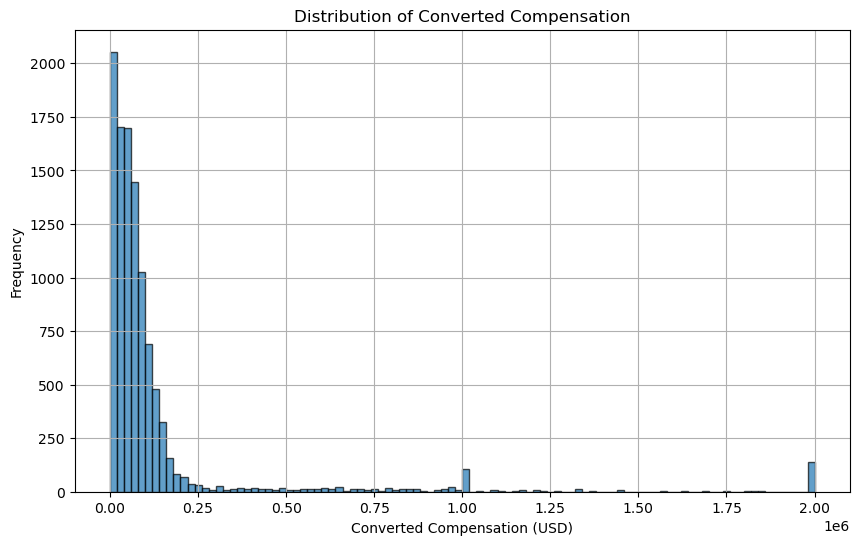

In [3]:
# your code goes here
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=100, edgecolor='k', alpha=0.7)
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Converted Compensation')
plt.grid(True)
plt.show()


In [4]:
median_age = df['Age'].median()

print("Median age of survey respondents:", median_age)

Median age of survey respondents: 29.0


Plot the histogram for the column `ConvertedComp`.


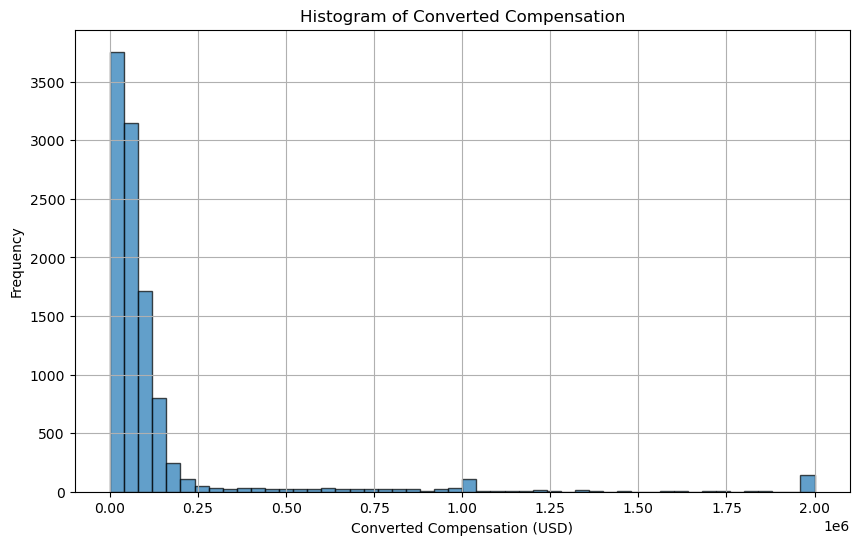

In [5]:
# your code goes here
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Converted Compensation')
plt.grid(True)
plt.show()

What is the median of the column `ConvertedComp`?


In [6]:
# your code goes here
median_converted_comp = df['ConvertedComp'].median()

print("Median of ConvertedComp:", median_converted_comp)

Median of ConvertedComp: 57745.0


How many responders identified themselves only as a **Man**?


In [7]:
# your code goes here
gender_counts = df['Gender'].value_counts()


man_count = gender_counts.get('Man', 0)

print("Number of responders identified as Man:", man_count)

Number of responders identified as Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
# your code goes here
woman_df = df[df['Gender'] == 'Woman']


median_converted_comp_woman = woman_df['ConvertedComp'].median()

print("Median ConvertedComp for responders identified as Woman:", median_converted_comp_woman)

Median ConvertedComp for responders identified as Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [9]:
# your code goes here
five_number_summary_age = df['Age'].describe()[['min', '25%', '50%', '75%', 'max']]

print("Five Number Summary for the column 'Age':")
print(five_number_summary_age)

Five Number Summary for the column 'Age':
min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


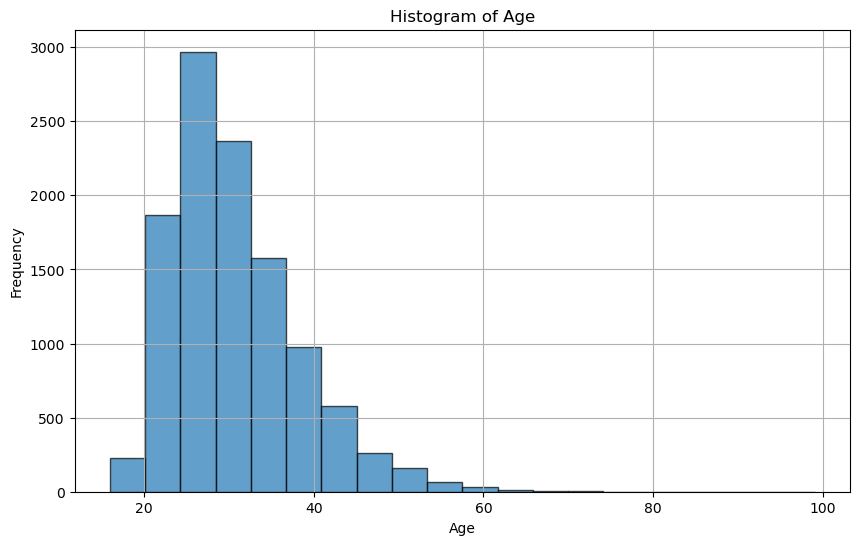

In [10]:
# your code goes here
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.grid(True)
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


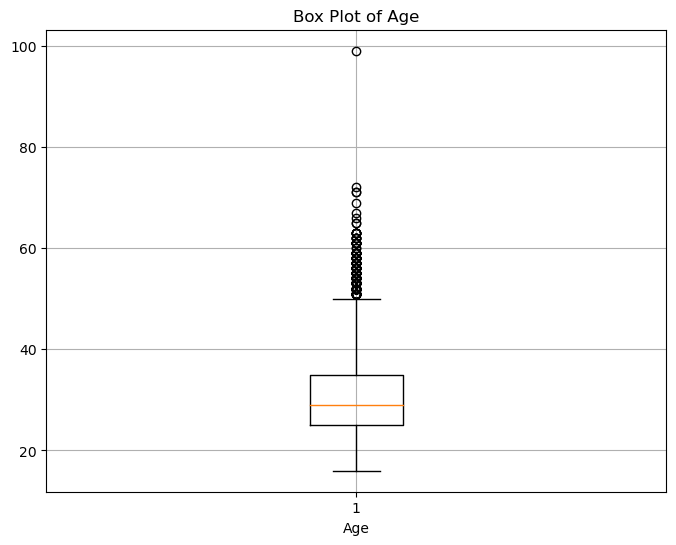

In [11]:
# your code goes here
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Remove rows with missing Age values (if needed)
df.dropna(subset=['Age'], inplace=True)

# Create the box plot of the "Age" column
plt.figure(figsize=(8, 6))
plt.boxplot(df['Age'], vert=True)
plt.xlabel('Age')
plt.title('Box Plot of Age')
plt.grid(True)
plt.show()

In [12]:
median_converted_comp = df['ConvertedComp'].median()

print("Median ConvertedComp:", median_converted_comp)

Median ConvertedComp: 57600.0


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [13]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)


IQR = Q3 - Q1

print("Interquartile Range (IQR) for the column 'ConvertedComp':", IQR)

Interquartile Range (IQR) for the column 'ConvertedComp': 73165.5


Find out the upper and lower bounds.


In [14]:
# your code goes here
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print("Upper Bound for the column 'ConvertedComp':", upper_bound)
print("Lower Bound for the column 'ConvertedComp':", lower_bound)

Upper Bound for the column 'ConvertedComp': 209748.25
Lower Bound for the column 'ConvertedComp': -82913.75


Identify how many outliers are there in the `ConvertedComp` column.


In [15]:
# your code goes here
outliers_count = ((df['ConvertedComp'] > upper_bound) | (df['ConvertedComp'] < lower_bound)).sum()

print("Number of outliers in the 'ConvertedComp' column:", outliers_count)

Number of outliers in the 'ConvertedComp' column: 861


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [16]:
# your code goes here
new_df = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]


new_df.reset_index(drop=True, inplace=True)


print(new_df)

      Respondent                      MainBranch Hobbyist  \
0              4  I am a developer by profession       No   
1              9  I am a developer by profession      Yes   
2             13  I am a developer by profession      Yes   
3             17  I am a developer by profession      Yes   
4             19  I am a developer by profession      Yes   
...          ...                             ...      ...   
9488       25134  I am a developer by profession      Yes   
9489       25136  I am a developer by profession      Yes   
9490       25137  I am a developer by profession      Yes   
9491       25138  I am a developer by profession      Yes   
9492       25141  I am a developer by profession      Yes   

                                            OpenSourcer  \
0                                                 Never   
1                            Once a month or more often   
2     Less than once a month but more than once per ...   
3     Less than once a month bu

In [17]:
median_converted_comp_new = new_df['ConvertedComp'].median()

print("Median ConvertedComp in the new DataFrame (after removing outliers):", median_converted_comp_new)

Median ConvertedComp in the new DataFrame (after removing outliers): 52356.0


In [18]:
mean_converted_comp_new = new_df['ConvertedComp'].mean()

print("Mean ConvertedComp in the new DataFrame (after removing outliers):", mean_converted_comp_new)

Mean ConvertedComp in the new DataFrame (after removing outliers): 59740.17044137786


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [19]:
# your code goes here
correlation_with_age = df.corr(numeric_only=True)['Age']


print("Correlation between Age and other numerical columns:")
print(correlation_with_age)

Correlation between Age and other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
